# **Iris Flower Classification**


---

# Objective
The aim is to classify iris flowers among three species from measurements of sepals and petals' length and width.The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.The central goal here is to design a model that makes useful classifications for new flowers or, in other words, one which exhibits good generalization.

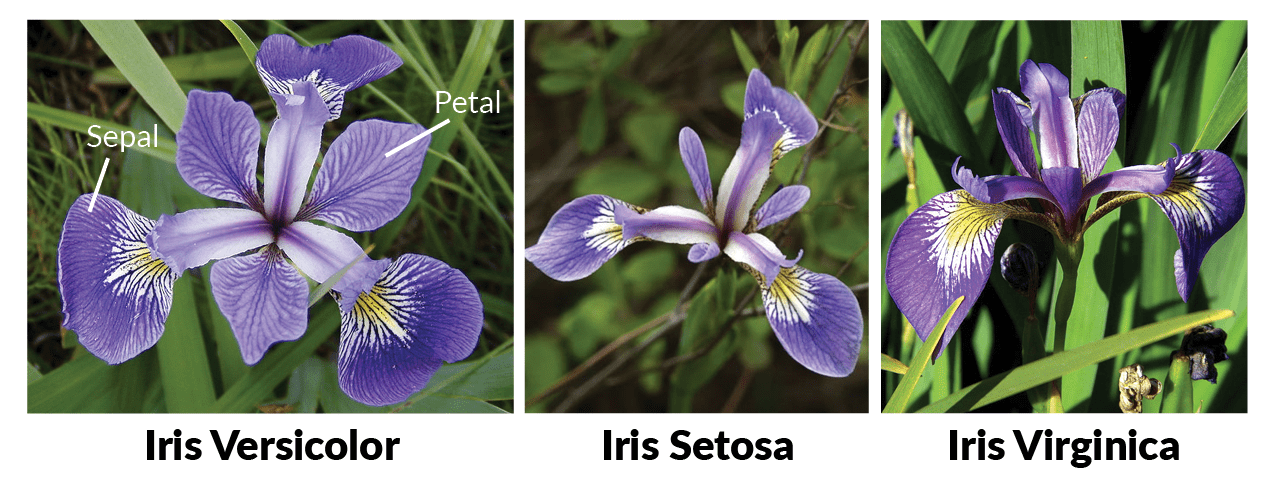



In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os
import kagglehub
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
path = kagglehub.dataset_download("uciml/iris")
csv_file_path = os.path.join(path, 'Iris.csv')
df = pd.read_csv(csv_file_path)
df = df.drop(columns='Id',axis=1)

# Pre Processing

**Label Encoding**





Zyaada kuch karne ki zaroorat nahi thi cuz Data is already Cleaned

In [31]:
label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species'])
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]

# Correlation Matrix

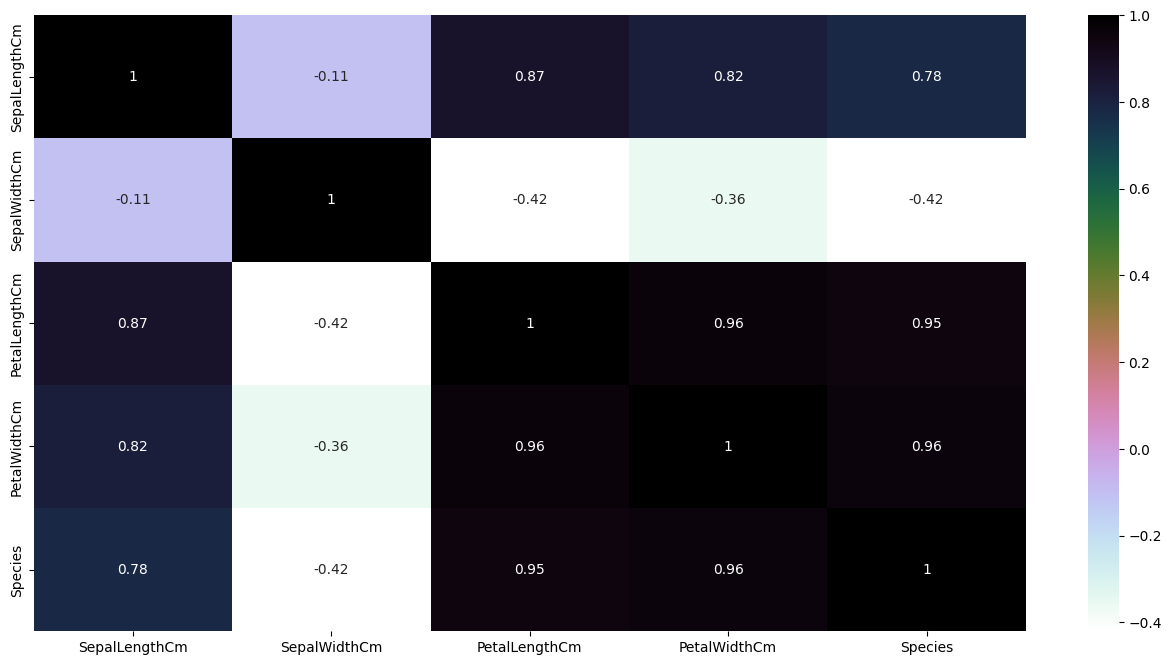

In [32]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

Let us Create 2 seperate X and y where we would see if there are changes if we take only the Highly Correlated ones or just keep it as it is

In [53]:
X = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:, 4].values

X1 = df.iloc[:,[2,3]].values
y1 = df.iloc[:, 4].values


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 2)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .3, random_state = 2)

**Feature scaling**

In [35]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

sc_X1 = StandardScaler()
X1_train = sc_X1.fit_transform(X1_train)
X1_test = sc_X1.fit_transform(X1_test)

# ***Logistic Regression***                   


---



Logistic Regression Uses Sigmoid Function

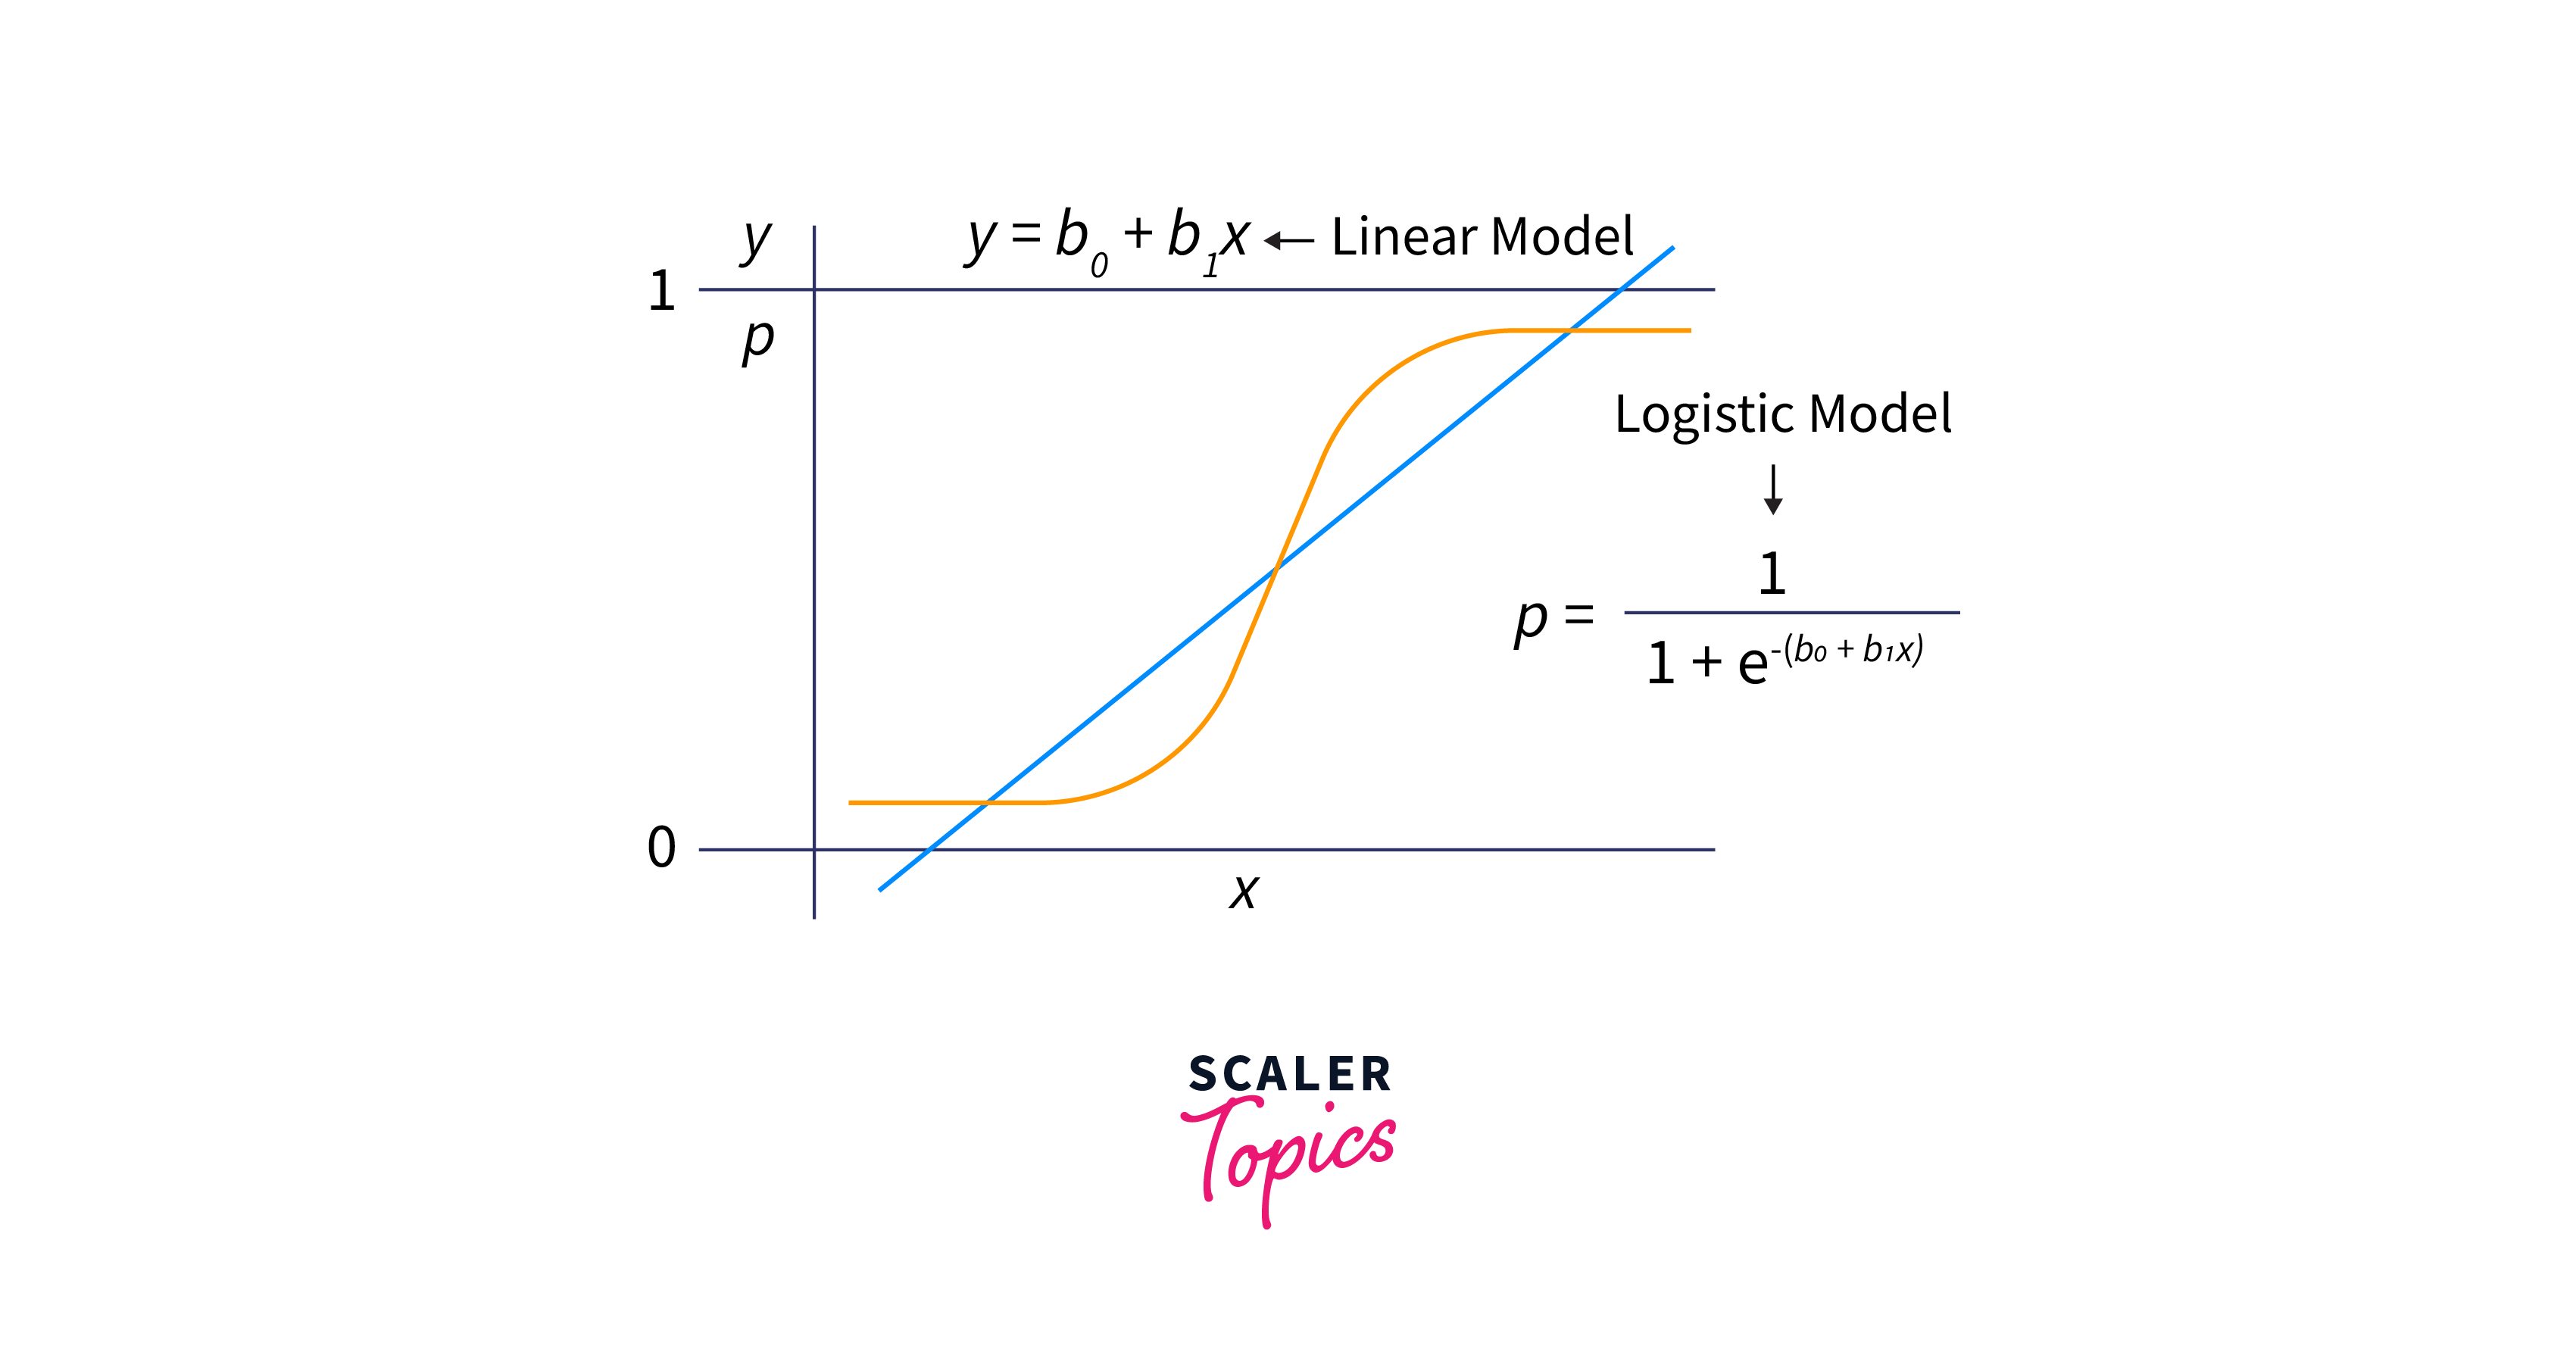

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression using Petals is:',accuracy_score(prediction,y_test))
print("R2 Score= %.2f"%r2_score(y_test, prediction))

The accuracy of the Logistic Regression using Petals is: 0.9555555555555556
R2 Score= 0.93


In [37]:
model = LogisticRegression()
model.fit(X1_train,y1_train)
prediction=model.predict(X1_test)
print('The accuracy of the Logistic Regression using Petals is:',accuracy_score(prediction,y1_test))
print("R2 Score= %.2f"%r2_score(y1_test, prediction))



The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
R2 Score= 0.97


The accuracy score of only considering Most Relavant ( Higher Correlation ) has greater Accuracy Score.
Observation: I Tried out taking Only Sepal Legnth and Sepal Width as my Columns in X1 and the R2 Score came out as 0.73 as compared to 0.97 R2 Score of Petal Length and Petal Width.


---



Let us Dive into the Regularisation Parameter 'c' of Logistic Regression. How it Varies with different C's and also ofcourse Visualise it


---



In [38]:
def plot_decision_boundary(model, X, y, title):
    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict the class for each point on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary as a filled contour plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot the actual data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

    # Add labels, title, and legend
    plt.xlabel('Petal Length (Standardized)')
    plt.ylabel('Petal Width (Standardized)')
    plt.title(title)
    plt.grid(True)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor', 'Virginica'])
    plt.show()

In [39]:
clf = LogisticRegression(C=0.01)
clf.fit(X1_train, y1_train)
p = clf.predict(X1_test)

print("R2 Score= %.2f"%r2_score(y_test, p))

R2 Score= 0.53


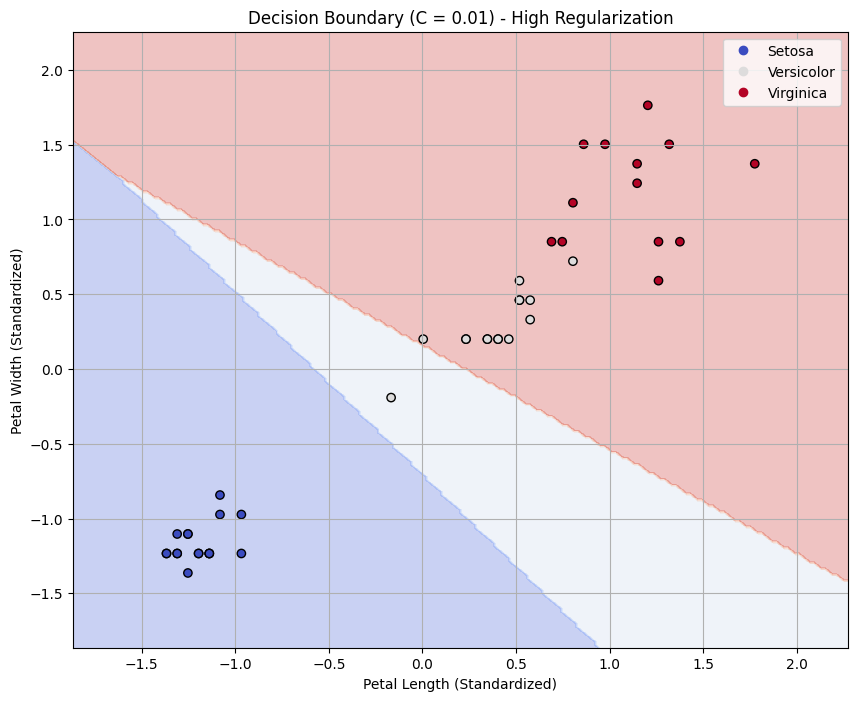

In [40]:
plot_decision_boundary(clf, X1_test, y1_test, 'Decision Boundary (C = 0.01) - High Regularization')

When regularization is too strong (low C), the model's coefficients are pushed towards zero. This can cause the model to underfit the data. Underfitting occurs when the model is too simple to capture the underlying patterns in the data, leading to a poor performance on both the training and testing sets.

In [41]:
clf2 = LogisticRegression(C=1)
clf2.fit(X1_train, y1_train)
p2 = clf2.predict(X1_test)
print("R2 Score= %.2f"%r2_score(y_test, p2))

R2 Score= 0.97


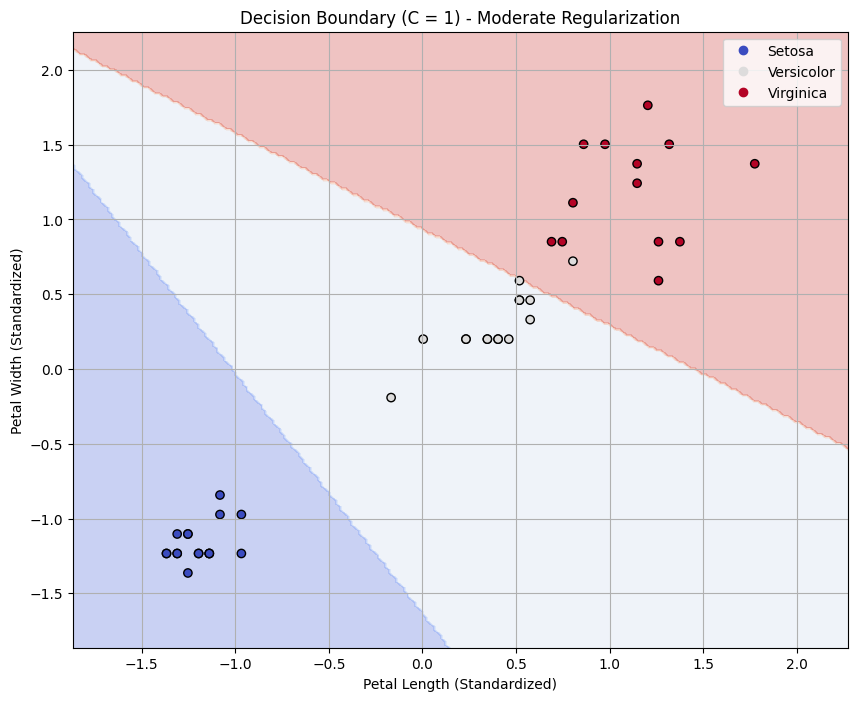

In [42]:

plot_decision_boundary(clf2, X1_test, y1_test, 'Decision Boundary (C = 1) - Moderate Regularization')

In [43]:
clf3 = LogisticRegression(C=100)
clf3.fit(X1_train, y1_train)
p3 = clf3.predict(X1_test)

print("R2 Score= %.2f"%r2_score(y_test, p3))

R2 Score= 0.97


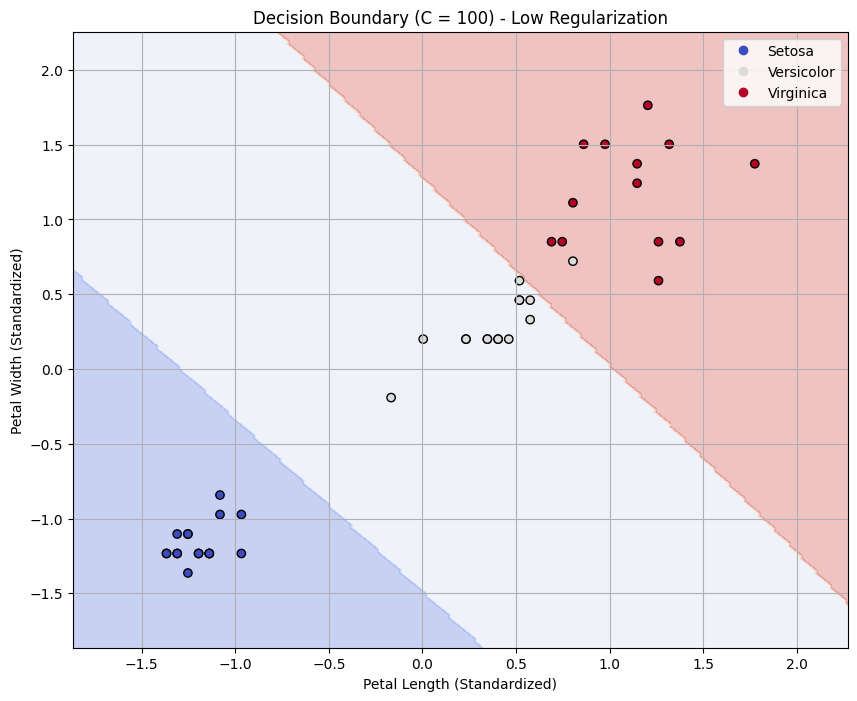

In [44]:
plot_decision_boundary(clf3, X1_test, y1_test, 'Decision Boundary (C = 100) - Low Regularization')

A high value of C (e.g., C=100) corresponds to a low regularization strength. This means the model is less restricted and can fit the training data more closely, potentially leading to a more complex, jagged decision boundary and a risk of overfitting.
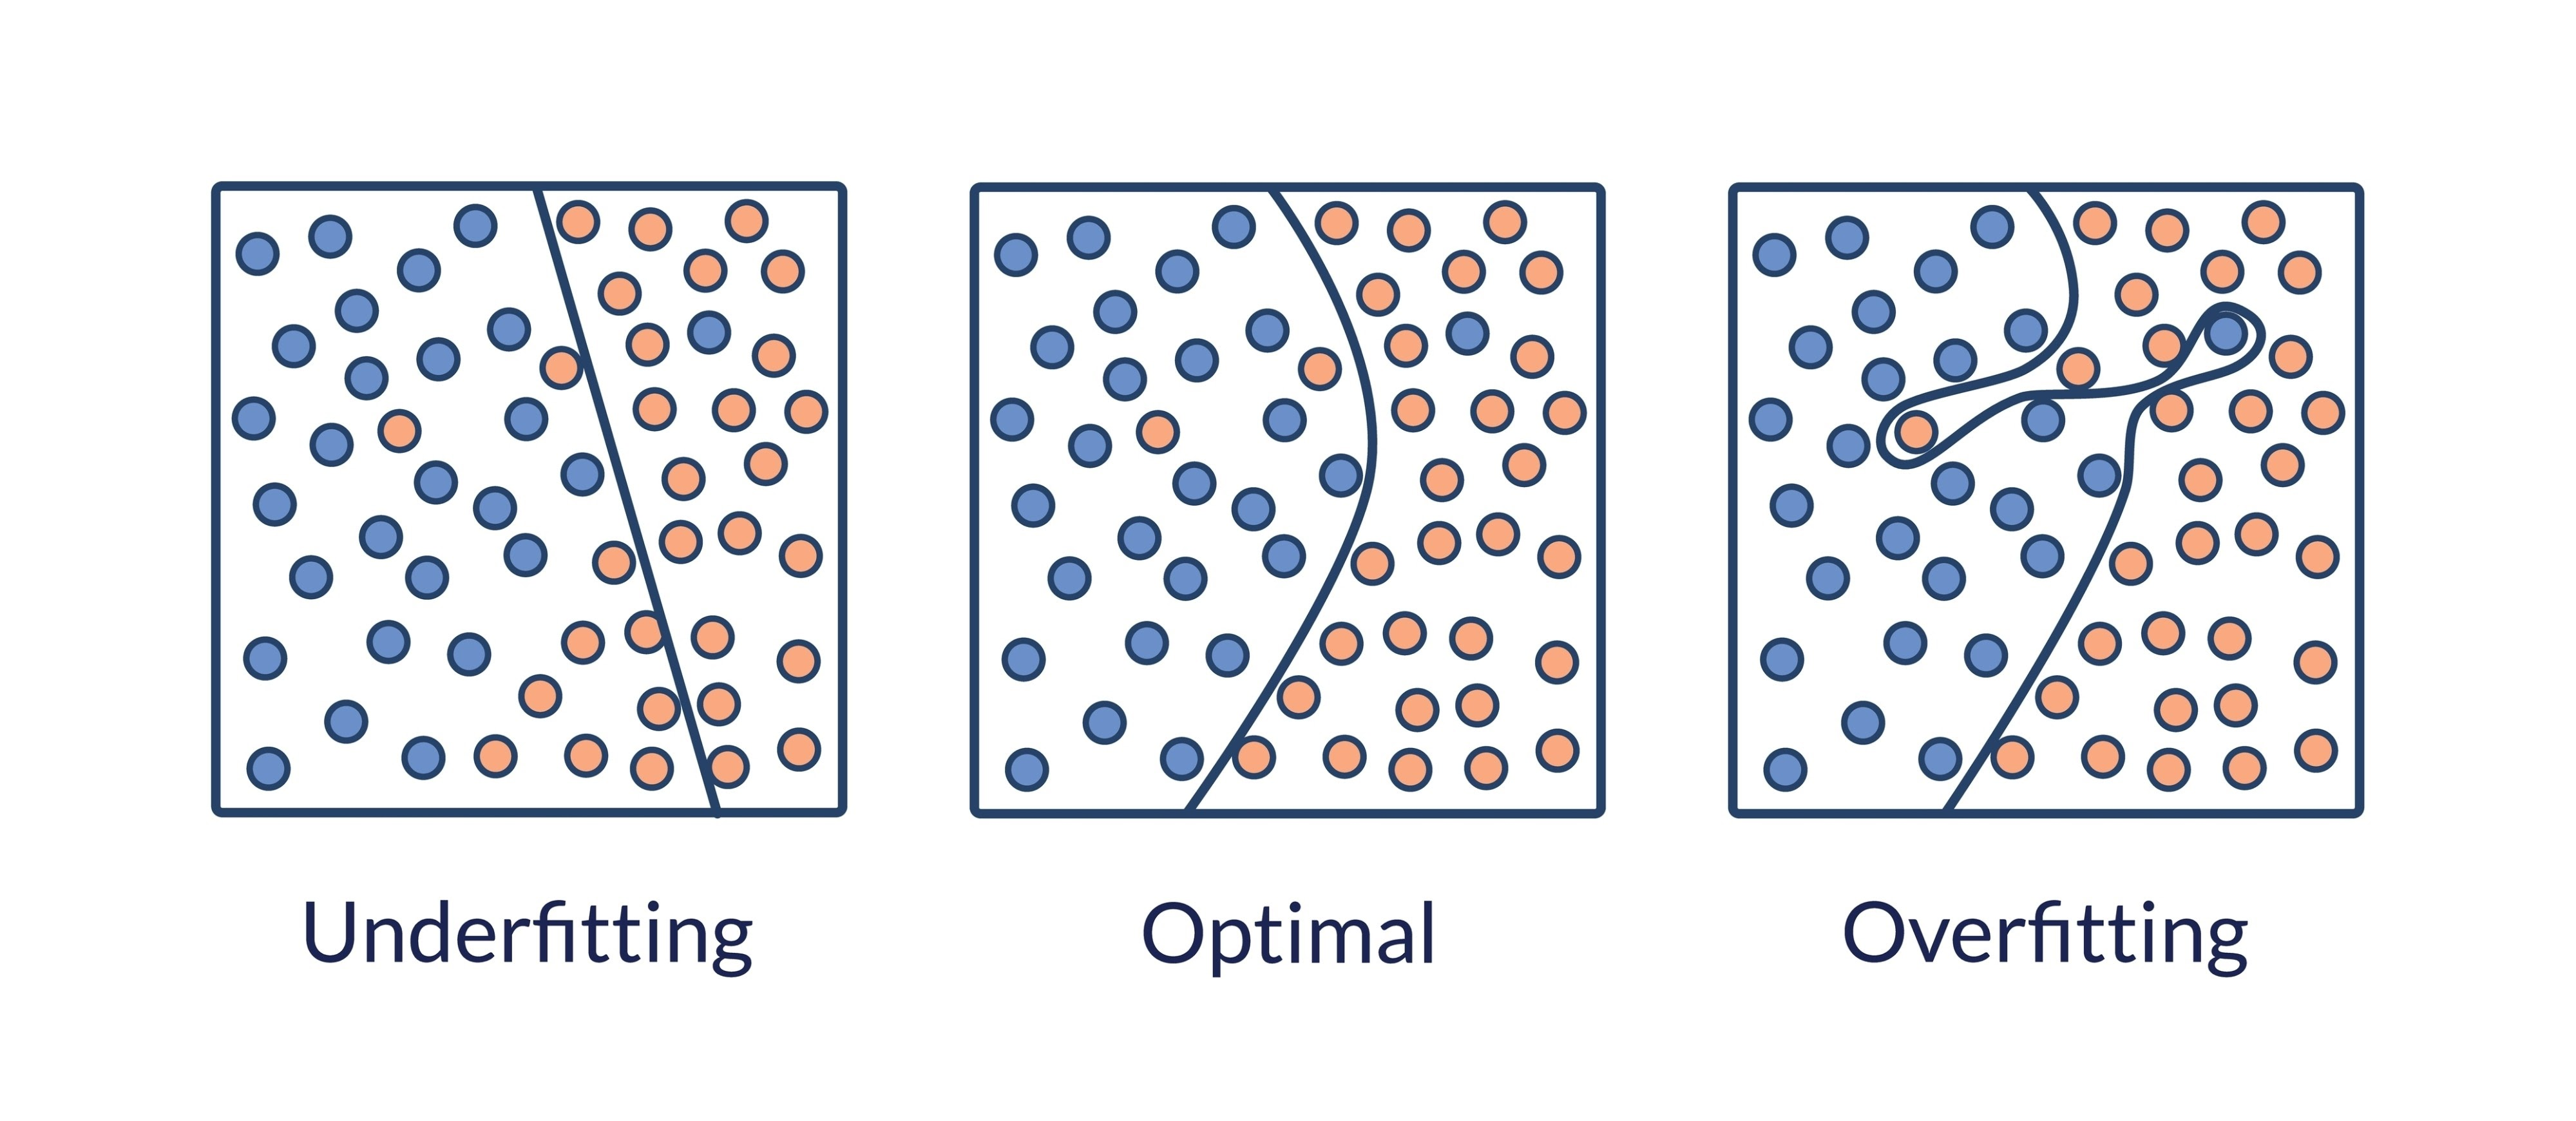

Question To Ponder Upon


---


There are few More other Parameters that we can look upon. But before that I wanted to see the effect of Overfitting when we took C = 100. Let us pile up some dummy data and predict on that and then see the Decision Boundary. Is it still giving the same result as before?

# Does the Concept Of Over Fitting Really Occurs?
Ofcourse I have used Gemini AI to create Dummy Data. Im not a Pro


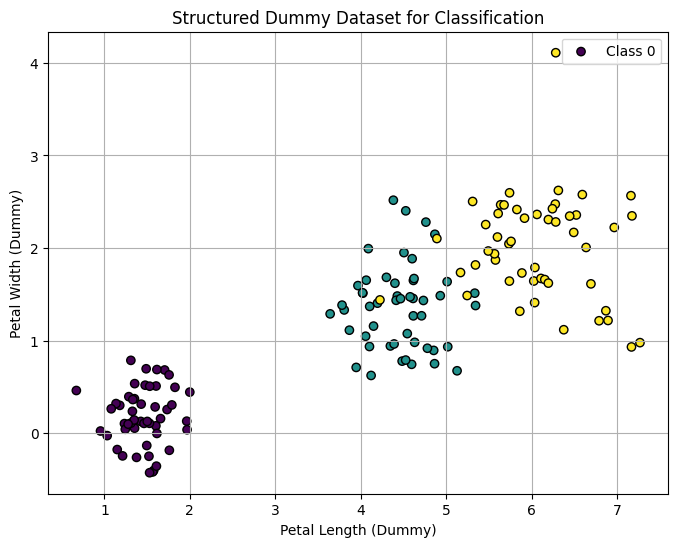

In [60]:
np.random.seed(42)

# --- Generate structured dummy data ---

# Define means and covariance matrices for each class cluster
# Setosa-like cluster (low values)
mean_0 = [1.5, 0.2]
cov_0 = [[0.1, 0.0], [0.0, 0.1]]

# Versicolor-like cluster (medium values)
mean_1 = [4.5, 1.3]
cov_1 = [[0.2, 0.0], [0.0, 0.2]]

# Virginica-like cluster (high values)
mean_2 = [6.0, 2.0]
cov_2 = [[0.3, 0.0], [0.0, 0.3]]

# Generate 50 random samples for each class
data_0 = np.random.multivariate_normal(mean_0, cov_0, 50)
data_1 = np.random.multivariate_normal(mean_1, cov_1, 50)
data_2 = np.random.multivariate_normal(mean_2, cov_2, 50)

# Combine the features into a single array
features = np.vstack([data_0, data_1, data_2])

# Create the corresponding species labels
species = np.array([0] * 50 + [1] * 50 + [2] * 50)

# Create a DataFrame for a better overview
dummy_df = pd.DataFrame(features, columns=['Petal_Length', 'Petal_Width'])
dummy_df['Species'] = species

# --- Visualize the structured dummy data to confirm the pattern ---
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=species, cmap='viridis', edgecolors='k')
plt.xlabel('Petal Length (Dummy)')
plt.ylabel('Petal Width (Dummy)')
plt.title('Structured Dummy Dataset for Classification')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.grid(True)
plt.show()

In [66]:
X_dummy = dummy_df.iloc[:,[0,1]].values
y_dummy = dummy_df.iloc[:,2].values
X_dummy = sc_X.fit_transform(X_dummy)

In [67]:
p3_dummies = clf3.predict(X_dummy)
print("R2 Score= %.2f"%r2_score(y_dummy, p3_dummies))

R2 Score= 0.94


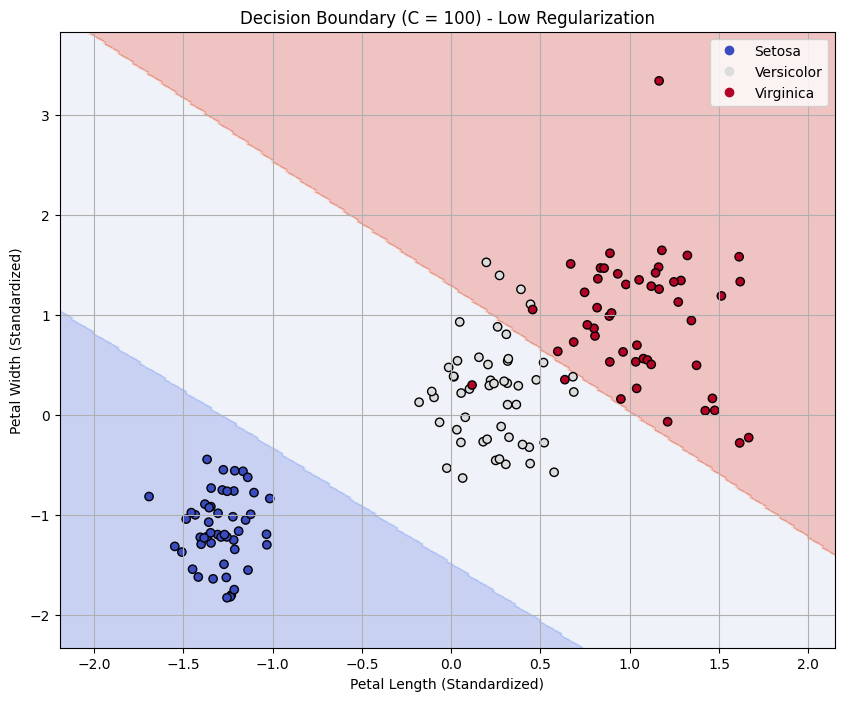

In [65]:
plot_decision_boundary(clf3, X_dummy, y_dummy, 'Decision Boundary (C = 100) - Low Regularization')

In [69]:
p1_dummies = clf.predict(X_dummy)
print("R2 Score= %.2f"%r2_score(y_dummy, p1_dummies))

R2 Score= 0.71


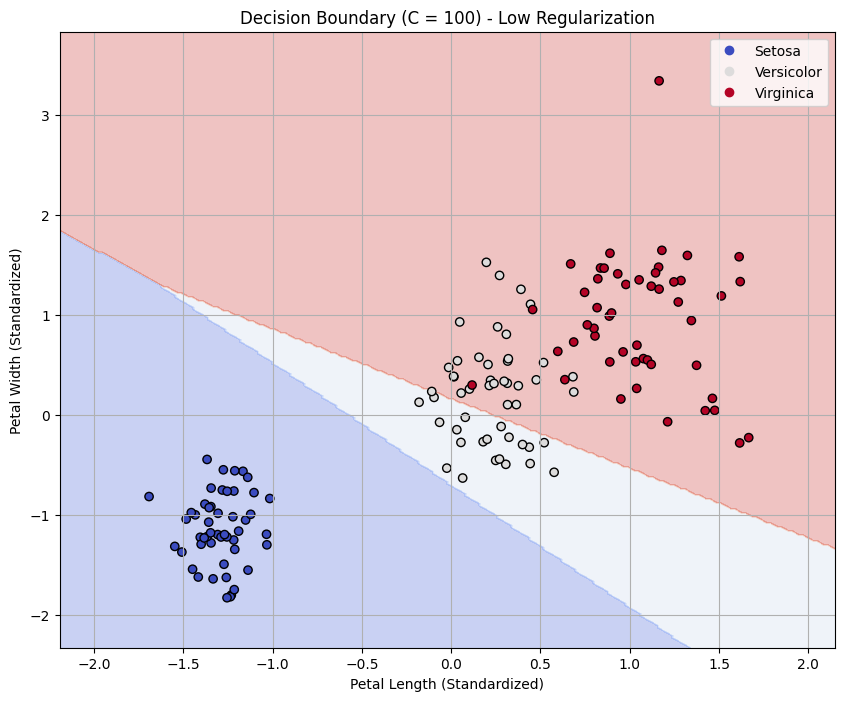

In [70]:
plot_decision_boundary(clf, X_dummy, y_dummy, 'Decision Boundary (C = 100) - Low Regularization')

In [71]:
p2_dummies = clf2.predict(X_dummy)
print("R2 Score= %.2f"%r2_score(y_dummy, p2_dummies))

R2 Score= 0.86


# Conclusion


---


*   For the Value of C = 100, The r2 has Decreased from 0.97 to 0.93
*   For a Value of C = 1, the r2 has Decreased from 0.97  to 0.86
*   For a value of C = 0.01, where the r2 was 0.53; It has increased to 0.71  

Maybe yes, over fitting really occurs.

